# Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ml tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# dl tools
# Sequential model to initialize our ANN and Dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

# Data loading

In [2]:
churn_data = pd.read_csv('Churn_Modelling (1).csv',index_col='RowNumber')

In [3]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# some columns are totally unproductive so lets remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding

In [8]:
churn_data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
churn_data['Geography']= churn_data['Geography'].map({'France':0,'Germany':1,'Spain':2})
churn_data['Gender'] = churn_data['Gender'].map({'Female':0,'Male':1})

In [10]:
churn_data_encoded = churn_data

In [11]:
churn_data_encoded

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


# EDA

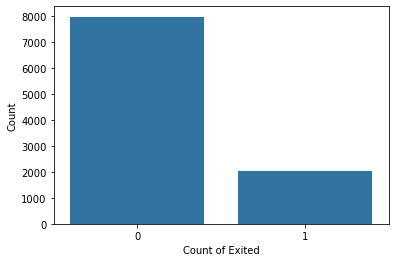

In [12]:
sns.countplot(x=churn_data_encoded['Exited'])
plt.xlabel('Count of Exited')
plt.ylabel('Count')
plt.show()

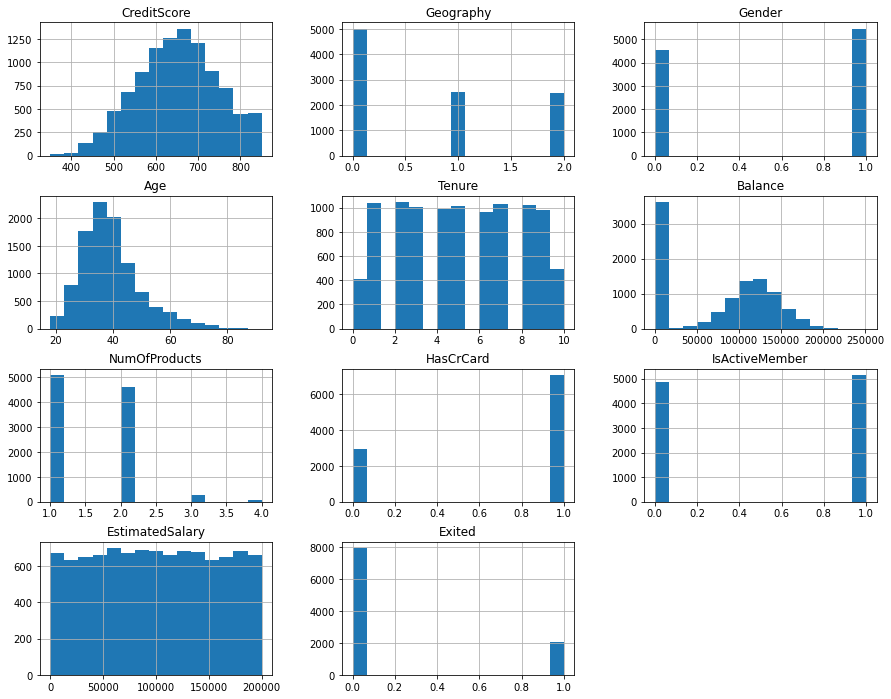

In [13]:
# distribution of all features
churn_data_encoded.hist(figsize=(15,12), bins=15)
plt.title("Features Distribution")
plt.show()

<AxesSubplot:>

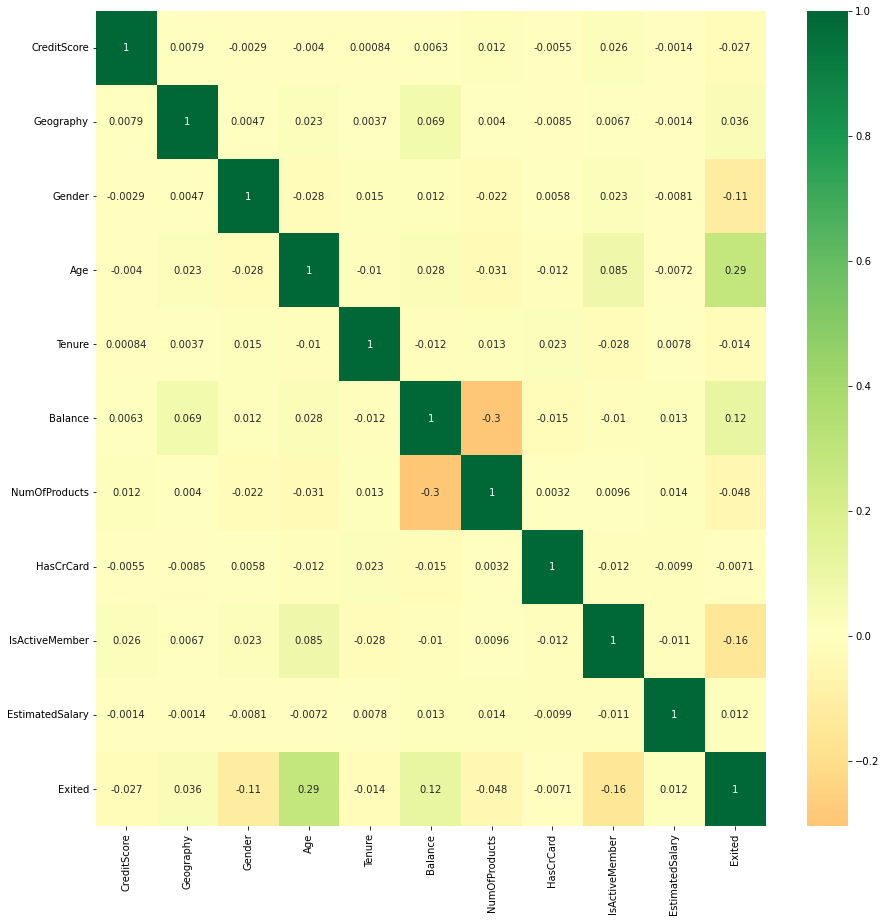

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(churn_data_encoded.corr(), annot=True, cmap="RdYlGn", center=0)

# Train test split

In [15]:
x = churn_data_encoded.drop(['Exited'], axis=1)
y = churn_data_encoded.Exited

In [16]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88
2,608,2,0,41,1,83807.86,1,0,1,112542.58
3,502,0,0,42,8,159660.80,3,1,0,113931.57
4,699,0,0,39,1,0.00,2,0,0,93826.63
5,850,2,0,43,2,125510.82,1,1,1,79084.10


In [17]:
y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
# Splitting the dataset into the Training set and Test sets

x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [19]:
# Feature scaling because yes we don't want one independent variable dominating the other and it makes computations easy
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# ANN Model For Classification

In [20]:
x_train.shape

(8000, 10)

In [21]:
model = Sequential(
[
    # Adding the input layer and the first hidden layer
    Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=10),
    # Adding the second hidden layer
    Dense(units=6, kernel_initializer='uniform', activation='relu'),
    # Adding the output layer
    Dense(units=1, kernel_initializer='uniform', activation='sigmoid'),
]
)

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Fitting the ANN to the Training set
history = model.fit(x_train, y_train, batch_size=10, epochs=100, verbose=0)

In [23]:
history.history

{'loss': [0.4938832223415375,
  0.42807313799858093,
  0.423554003238678,
  0.4192926585674286,
  0.41654953360557556,
  0.4140506386756897,
  0.41221410036087036,
  0.41088566184043884,
  0.4098323583602905,
  0.40909165143966675,
  0.40808403491973877,
  0.40768003463745117,
  0.4069933295249939,
  0.40672168135643005,
  0.4059757590293884,
  0.40551143884658813,
  0.4049052894115448,
  0.40476346015930176,
  0.40362709760665894,
  0.4030997157096863,
  0.4023435413837433,
  0.40176627039909363,
  0.4013483226299286,
  0.4006517231464386,
  0.3999587297439575,
  0.3997095823287964,
  0.3992276191711426,
  0.39874476194381714,
  0.3989626467227936,
  0.39846253395080566,
  0.39767855405807495,
  0.3980584144592285,
  0.39708879590034485,
  0.39715859293937683,
  0.3972272276878357,
  0.39721909165382385,
  0.3964879512786865,
  0.39668840169906616,
  0.39663437008857727,
  0.39667239785194397,
  0.39637991786003113,
  0.39638781547546387,
  0.39694932103157043,
  0.39627984166145325,


# Score and metrics

In [24]:
score, acc = model.evaluate(x_train, y_train,batch_size=10)
print('Train score', score)
print('Train accuracy', acc)

800/800 [==============================] - 2s 2ms/step - loss: 0.3920 - accuracy: 0.8370
Train score 0.39195072650909424
Train accuracy 0.8370000123977661


In [78]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

63/63 [==============================] - 0s 1ms/step


In [79]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

accuracy_score(y_test,y_pred)

0.8415

Text(0.5, 15.0, 'Prediction label')

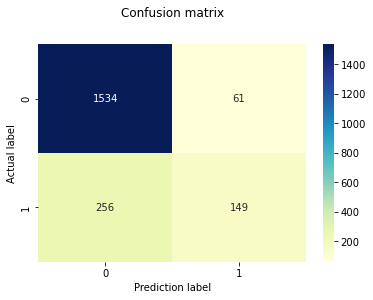

In [28]:
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

In [29]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.71      0.37      0.48       405

    accuracy                           0.84      2000
   macro avg       0.78      0.66      0.70      2000
weighted avg       0.83      0.84      0.82      2000



63/63 [==============================] - 0s 1ms/step


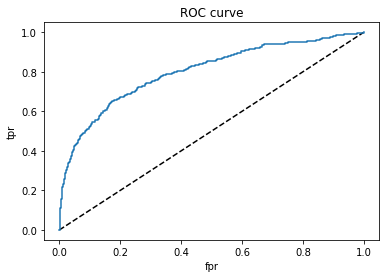

In [30]:
from sklearn.metrics import roc_curve

# Predict probabilities using the model
y_pred_proba = model.predict(x_test)

# Assuming y_test is binary (0 and 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Predictive system

In [61]:
x_test_reshaped = x_test[5].reshape(1, -1)
result = model.predict(x_test_reshaped)
(result > 0.5).astype(int)

1/1 [==============================] - 0s 31ms/step


array([[1]])

In [62]:
y_test.iloc[5]

1

In [73]:
import pandas as pd
import numpy as np

def pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):
    features = np.array([CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary])
    features = features.reshape(1, -1)  # Reshape to (1, input_dim)
    result = model.predict(features)
    result = (result > 0.5).astype(int)
    return result


In [74]:
# Example usage:
CreditScore = 619
Geography = 0
Gender = 0
Age = 42
Tenure = 2
Balance = 0.0
NumOfProducts = 1
HasCrCard = 1
IsActiveMember = 1
EstimatedSalary = 101348.88

result = pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary)
print(result)

1/1 [==============================] - 0s 24ms/step
[[1]]


In [75]:
if result == 1:
    print("Churn")
else:
    print("Not Churn")

Churn


In [76]:
churn_data.iloc[0]

CreditScore           619.00
Geography               0.00
Gender                  0.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
Exited                  1.00
Name: 1, dtype: float64

# save model

In [77]:
model.save('model.h5')